# Airbnb-New York

Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Airbnb_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_gp,neighbourhood,latitude,longitude,room_type,price,min_nights,no_of_reviews,last_review,reviews_per_month,host_counts,availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


Task: Predict the rental price

In [3]:
df.shape

(48895, 16)

In [4]:
df.dtypes

id                     int64
name                  object
host_id                int64
host_name             object
neighbourhood_gp      object
neighbourhood         object
latitude             float64
longitude            float64
room_type             object
price                  int64
min_nights             int64
no_of_reviews          int64
last_review           object
reviews_per_month    float64
host_counts            int64
availability           int64
dtype: object

In [5]:
#statistical summary of numeric columns
df.describe()

,id,host_id,latitude,longitude,price,min_nights,no_of_reviews,reviews_per_month,host_counts,availability
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Data preprocessing

In [6]:
#Checking for duplicates
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 16)

No duplicates

In [7]:
df.isnull().sum()

id                       0
name                    16
host_id                  0
host_name               21
neighbourhood_gp         0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
min_nights               0
no_of_reviews            0
last_review          10052
reviews_per_month    10052
host_counts              0
availability             0
dtype: int64

Dataset consist of some null values in name, host_name, last_review, reviews_per_month column

-->id and host_name have nothing to do with our analysis
--> columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist



In [8]:
#let me drop some unnecassary features
df.drop(['id', 'name','host_name','last_review'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_gp,neighbourhood,latitude,longitude,room_type,price,min_nights,no_of_reviews,reviews_per_month,host_counts,availability
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


 For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [9]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

In [10]:
df.shape

(48895, 12)

Treating categorical data

In [11]:
df.neighbourhood_gp.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [13]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

The above categorical data is useful for EDA hence i will perform label encoding on them after EDA

Checking for outliers

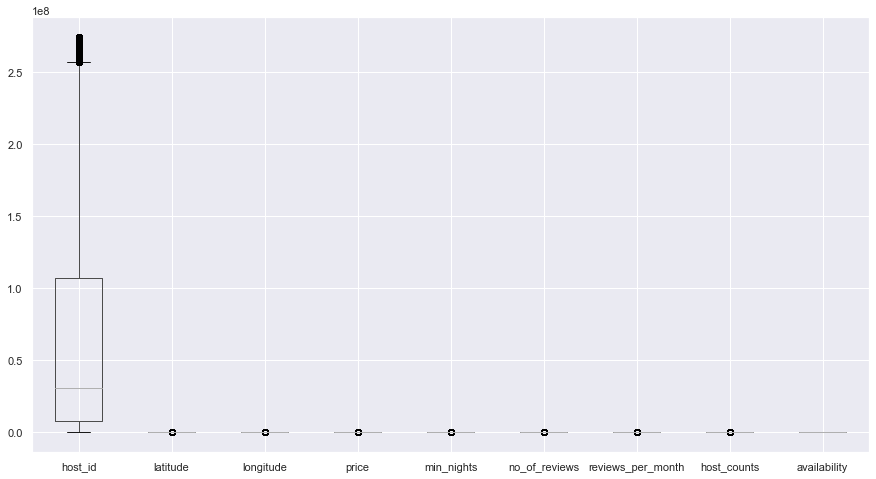

In [14]:
df.boxplot(figsize=(15,8))

Treating outliers using quantiles

Outliers will be any points below quantile 0.1 or above quantile 0.9

In [15]:
print(df['host_id'].quantile(0.10))
print(df['host_id'].quantile(0.90))

2027013.0
212811431.39999992


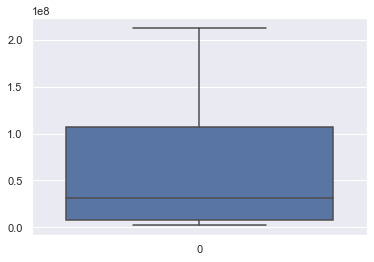

In [16]:
df["host_id"] = np.where(df["host_id"] <2027013.0, 2027013.0,df['host_id'])
df["host_id"] = np.where(df["host_id"] >212860449.2, 212860449.2,df['host_id'])
sns.boxplot(data=df.host_id)

In [17]:
print(df['latitude'].quantile(0.10))
print(df['latitude'].quantile(0.90))

40.66799
40.80489


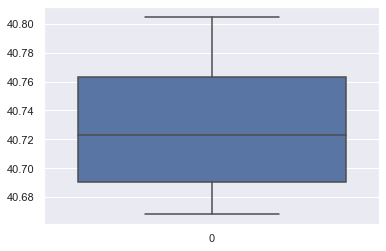

In [18]:
df["latitude"] = np.where(df["latitude"] <40.667988, 40.667988,df['latitude'])
df["latitude"] = np.where(df["latitude"] >40.80489, 40.80489,df['latitude'])
sns.boxplot(data=df.latitude)

In [19]:
print(df['longitude'].quantile(0.10))
print(df['longitude'].quantile(0.90))

-73.99669
-73.90781


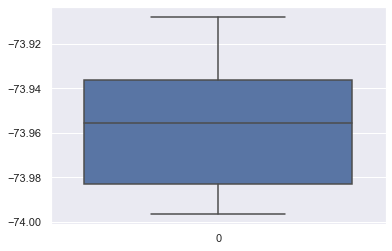

In [20]:
df["longitude"] = np.where(df["longitude"] <-73.99669, -73.99669,df['longitude'])
df["longitude"] = np.where(df["longitude"] >-73.90781, -73.90781,df['longitude'])
sns.boxplot(data=df.longitude)

In [21]:
print(df['price'].quantile(0.10))
print(df['price'].quantile(0.90))

49.0
269.0


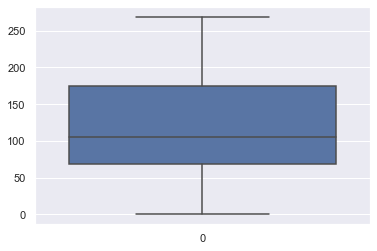

In [22]:
df["price"] = np.where(df["price"] <-49.0, 49.0,df['price'])
df["price"] = np.where(df["price"] >269.0, 269.0,df['price'])
sns.boxplot(data=df.price)

In [23]:
print(df['min_nights'].quantile(0.25))
print(df['min_nights'].quantile(0.75))

1.0
5.0


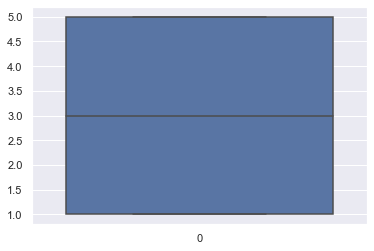

In [24]:
df["min_nights"] = np.where(df["min_nights"] <1.0, 1.0,df['min_nights'])
df["min_nights"] = np.where(df["min_nights"] >5.0, 5.0,df['min_nights'])
sns.boxplot(data=df.min_nights)

In [25]:
print(df['no_of_reviews'].quantile(0.1))
print(df['no_of_reviews'].quantile(0.9))

0.0
70.0


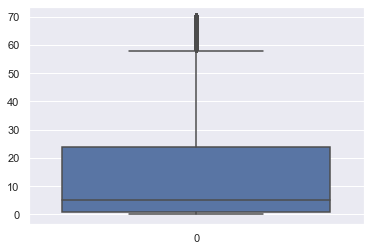

In [26]:
df["no_of_reviews"] = np.where(df["no_of_reviews"] <0.0, 1.0,df['no_of_reviews'])
df["no_of_reviews"] = np.where(df["no_of_reviews"] >70.0, 70.0,df['no_of_reviews'])
sns.boxplot(data=df.no_of_reviews)

In [27]:
print(df['reviews_per_month'].quantile(0.1))
print(df['reviews_per_month'].quantile(0.9))

0.0
3.25


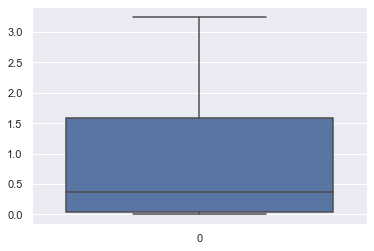

In [28]:
df["reviews_per_month"] = np.where(df["reviews_per_month"] <0.0, 0.0,df['reviews_per_month'])
df["reviews_per_month"] = np.where(df["reviews_per_month"] >3.25, 3.25,df['reviews_per_month'])
sns.boxplot(data=df.reviews_per_month)

In [29]:
print(df['host_counts'].quantile(0.1))
print(df['host_counts'].quantile(0.9))

1.0
5.0


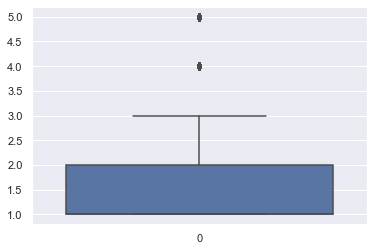

In [30]:
df["host_counts"] = np.where(df["host_counts"] <1.0, 1.0,df['host_counts'])
df["host_counts"] = np.where(df["host_counts"] >5.0, 5.0,df['host_counts'])
sns.boxplot(data=df.host_counts)

In [31]:
df.head()

,host_id,neighbourhood_gp,neighbourhood,latitude,longitude,room_type,price,min_nights,no_of_reviews,reviews_per_month,host_counts,availability
0,2027013.0,Brooklyn,Kensington,40.667988,-73.97237,Private room,149.0,1.0,9.0,0.21,5.0,365
1,2027013.0,Manhattan,Midtown,40.753620,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355
2,2027013.0,Manhattan,Harlem,40.804890,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365
3,2027013.0,Brooklyn,Clinton Hill,40.685140,-73.95976,Entire home/apt,89.0,1.0,70.0,3.25,1.0,194
4,2027013.0,Manhattan,East Harlem,40.798510,-73.94399,Entire home/apt,80.0,5.0,9.0,0.10,1.0,0


# Data visualization

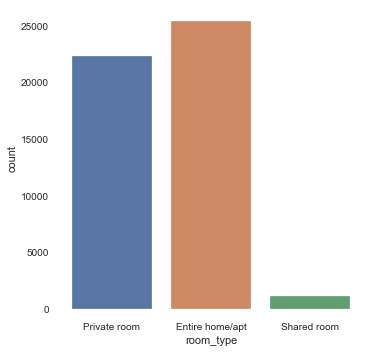

In [73]:
#Preferred room type
sns.catplot(x="room_type", kind="count", data=df);

By seeing the above bar graph, it is clear that entire home or apartment is most preferred room type. Shared room is least one,

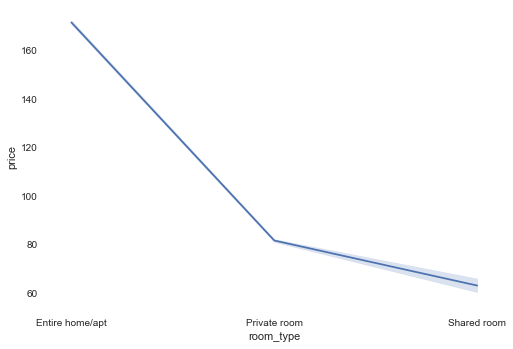

In [69]:
#Does price affect the preffered room type
sns.lineplot(x="room_type", y="price", data=df)

As per the above plot, shared room is least preffered even after low cost. The reason might be due to privacy concerns, cleanliness or individual choice.

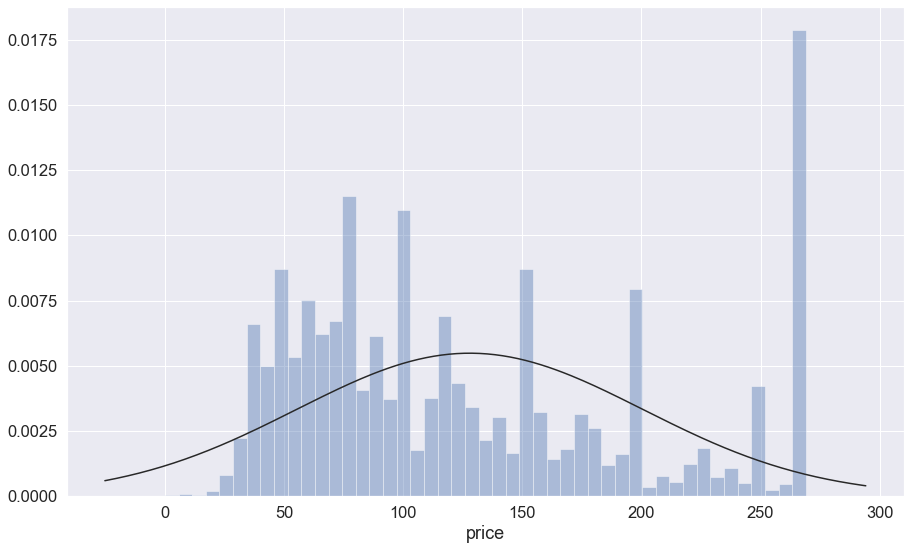

In [33]:
#Price range
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.price, kde=False, fit=norm)

<function matplotlib.pyplot.show(*args, **kw)>

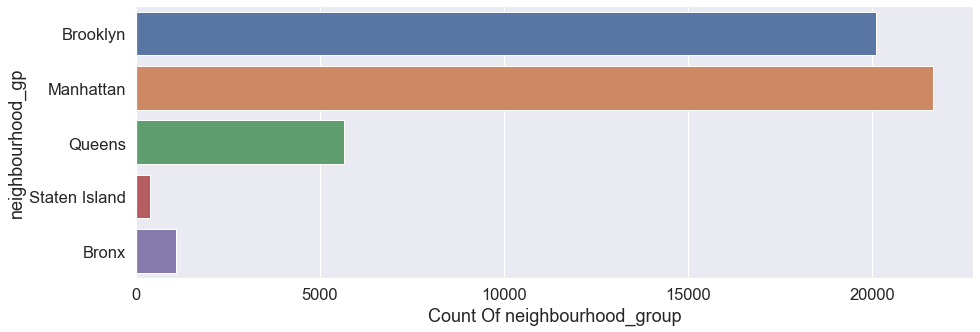

In [38]:
#Which neighbourhood group has maximum counts?
plt.figure(1,figsize=(15,5))
sns.countplot(y='neighbourhood_gp',data=df)
plt.xlabel('Count Of neighbourhood_group')
plt.show

In [42]:
#from pandas_profiling import ProfileReport

In [43]:
#profile = ProfileReport(df, title = 'Pandas_profiling', explorative = True)

In [44]:
#profile.to_widgets()